# Simple Linear Regression

Download the Data Science from Scratch repository into the folder `dsfs`.

In [1]:
import os

if not os.path.isdir('dsfs'):
    !git clone --depth 1 https://github.com/joelgrus/data-science-from-scratch dsfs

Import the needed functions.

In [2]:
import sys
sys.path.append('dsfs') # fix imports

from dsfs.scratch.linear_algebra import Vector
from dsfs.scratch.statistics import correlation, standard_deviation, mean, num_friends_good, daily_minutes_good, de_mean
from dsfs.scratch.gradient_descent import gradient_step

import matplotlib.pyplot as plt
plt.close() # remove plot made by imports

## The Model

In [3]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

In [4]:
def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    """
    The error from predicting beta * x_i + alpha
    when the actual value is y_i
    """
    return predict(alpha, beta, x_i) - y_i

In [5]:
def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

In [6]:
from typing import Tuple

def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
    """
    Given two vectors x and y,
    find the least-squares values of alpha and beta
    """
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

In [7]:
x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in x]

# Should find that y = 3x - 5
assert least_squares_fit(x, y) == (-5, 3)

In [8]:
alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
assert 22.9 < alpha < 23.0
assert 0.9 < beta < 0.905

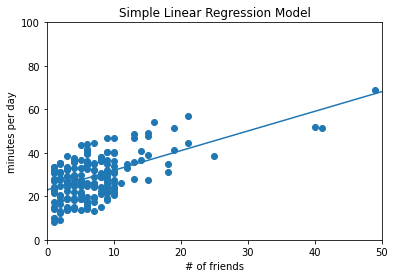

In [9]:
import matplotlib.pyplot as plt

plt.scatter(num_friends_good, daily_minutes_good)
plt.plot(x, [predict(alpha, beta, x_i) for x_i in x])

plt.xlim([0, 50])
plt.ylim([0, 100])

plt.xlabel('# of friends')
plt.ylabel('minutes per day')

plt.title('Simple Linear Regression Model')
plt.show()

In [10]:
def total_sum_of_squares(y: Vector) -> float:
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    """
    the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model
    """
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

rsq = r_squared(alpha, beta, num_friends_good, daily_minutes_good)
assert 0.328 < rsq < 0.330

## Using Gradient Descent

In [11]:
import random
import tqdm

num_epochs = 10000
random.seed(0)

guess = [random.random(), random.random()]  # choose random value to start

learning_rate = 0.00001

with tqdm.trange(num_epochs) as t:
    for _ in t:
        alpha, beta = guess

        # Partial derivative of loss with respect to alpha
        grad_a = sum(2 * error(alpha, beta, x_i, y_i)
                        for x_i, y_i in zip(num_friends_good,
                                            daily_minutes_good))

        # Partial derivative of loss with respect to beta
        grad_b = sum(2 * error(alpha, beta, x_i, y_i) * x_i
                        for x_i, y_i in zip(num_friends_good,
                                            daily_minutes_good))

        # Compute loss to stick in the tqdm description
        loss = sum_of_sqerrors(alpha, beta,
                                num_friends_good, daily_minutes_good)
        t.set_description(f"loss: {loss:.3f}")

        # Finally, update the guess
        guess = gradient_step(guess, [grad_a, grad_b], -learning_rate)

# We should get pretty much the same results:
alpha, beta = guess
assert 22.9 < alpha < 23.0
assert 0.9 < beta < 0.905

loss: 13197.435:  28%|██▊       | 2841/10000 [00:01<00:03, 1883.74it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

loss: 13196.619:  95%|█████████▍| 9464/10000 [00:05<00:00, 1675.77it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



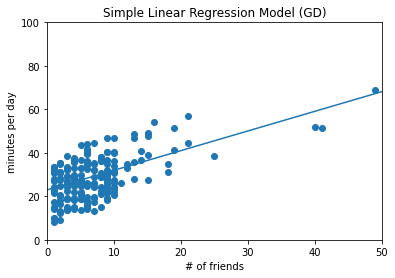

In [12]:
import matplotlib.pyplot as plt

plt.scatter(num_friends_good, daily_minutes_good)
plt.plot(x, [predict(alpha, beta, x_i) for x_i in x])

plt.xlim([0, 50])
plt.ylim([0, 100])

plt.xlabel('# of friends')
plt.ylabel('minutes per day')

plt.title('Simple Linear Regression Model (GD)')
plt.show()